# Format Chart

### First
importing library and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset

#Loading Data
dataset1 = load_dataset('lukebarousse/data_jobs')
dataf = dataset1['train'].to_pandas()
df = dataf.copy()

#Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\AB\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<Axes: xlabel='job_title_short'>

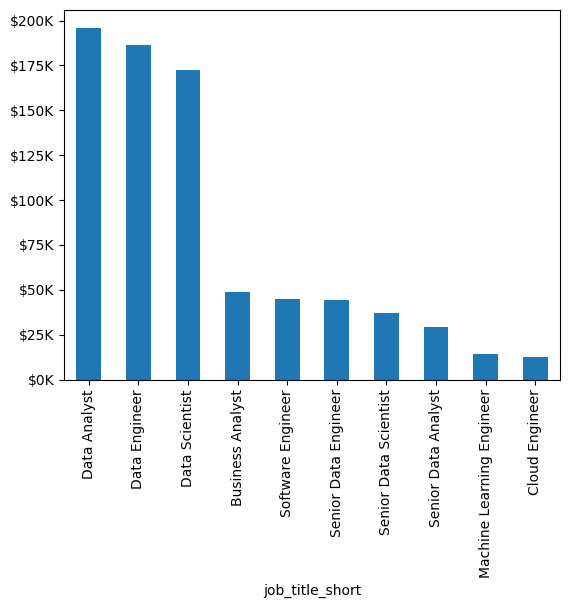

In [2]:
fig,ax = plt.subplots()
ax = plt.gca()
ax.yaxis.set_major_formatter(
    plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
df['job_title_short'].value_counts().plot(kind='bar')

In [12]:
df['job_title_short'].value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [15]:
df['job_schedule_type'].value_counts().head(4)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Part-time       7881
Name: count, dtype: int64

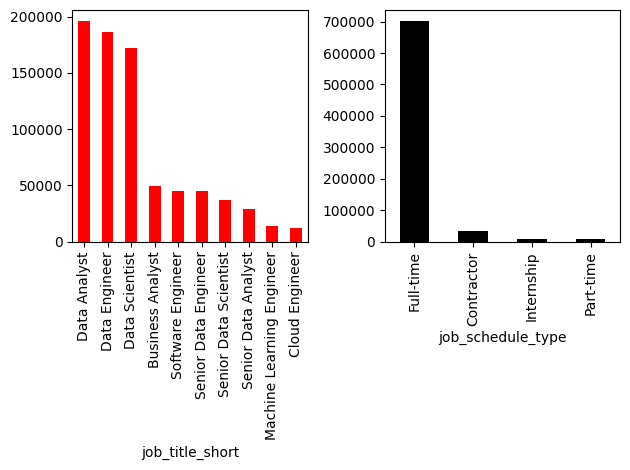

In [24]:
fig,ax = plt.subplots(1,2)

df['job_title_short'].value_counts().plot(kind='bar',ax=ax[0],color='red')
df['job_schedule_type'].value_counts().head(4).plot(kind='bar',ax=ax[1],color='black')

fig.tight_layout()

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Full-time'),
  Text(1, 0, 'Contractor'),
  Text(2, 0, 'Internship'),
  Text(3, 0, 'Part-time'),
  Text(4, 0, 'Full-time and Part-time')])

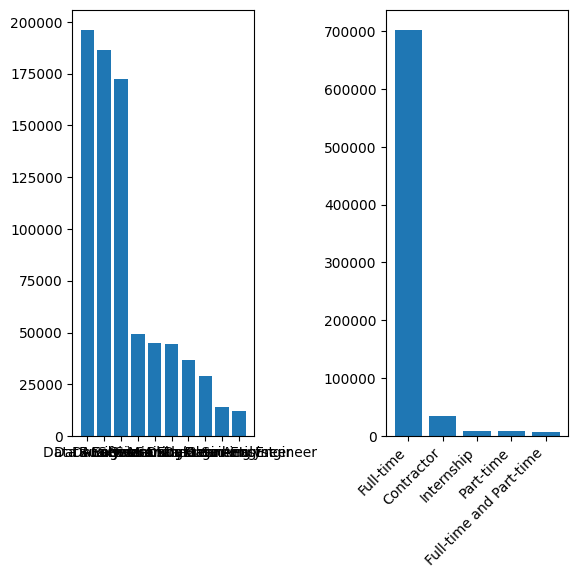

In [40]:
fig, ax = plt.subplots(1, 2)

ax[0].bar(df['job_title_short'].value_counts().index,df['job_title_short'].value_counts())
ax[1].bar(df['job_schedule_type'].value_counts().head(5).index,df['job_schedule_type'].value_counts().head(5))

fig.tight_layout()
plt.xticks(rotation=45,ha='right')
plt.xticks(rotation=45,ha='right')

In [43]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count',ascending=False,inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


In [45]:
job_titles = ['Data Analyst','Data Engineer','Data Scientist']

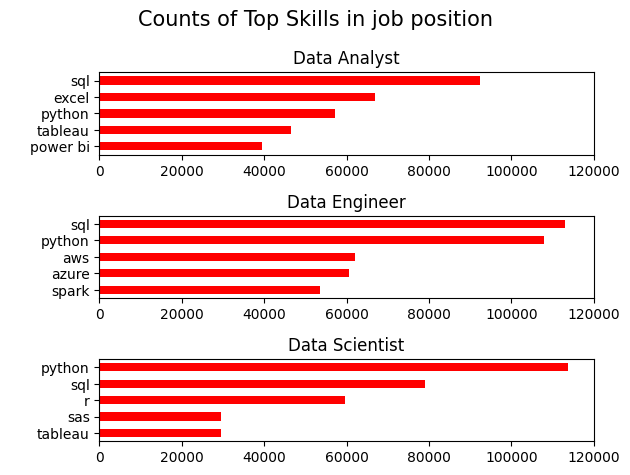

In [74]:
fig,ax = plt.subplots(3,1)

for i,job_title in enumerate(job_titles):
    df_plot=df_skills_count[df_skills_count['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh',x='job_skills',y='skill_count',ax=ax[i],color='red',title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel(' ')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,120000)

fig.suptitle('Counts of Top Skills in job position',fontsize=15)
plt.tight_layout()

In [54]:
df_plot

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1823,sql,Data Scientist,78982
1518,r,Data Scientist,59566
1637,sas,Data Scientist,29534
1943,tableau,Data Scientist,29445


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

### Country DF

In [77]:
df_country=df.pivot_table(index='job_country',columns='job_title_short',aggfunc='size')

In [85]:
df_country[df_country.index=='United States']

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
United States,7382.0,423.0,67816.0,35080.0,58830.0,921.0,11791.0,9289.0,12946.0,1814.0


In [106]:
countries = ['United States','India','Spain','Germany','France']

In [107]:
df_country.loc[countries]

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
United States,7382.0,423.0,67816.0,35080.0,58830.0,921.0,11791.0,9289.0,12946.0,1814.0
India,1887.0,351.0,6121.0,19062.0,13279.0,671.0,1083.0,4353.0,2486.0,1795.0
Spain,1505.0,567.0,5177.0,6740.0,5598.0,600.0,616.0,1375.0,1346.0,1576.0
Germany,817.0,189.0,7131.0,6675.0,6745.0,402.0,1216.0,2041.0,1737.0,741.0
France,738.0,338.0,13803.0,10936.0,9497.0,388.0,804.0,1186.0,1029.0,1203.0


In [110]:
top_3 = df['job_title_short'].value_counts().head(3)
top_3 = top_3.index
top_3 = top_3.tolist()

In [112]:
top_3

['Data Analyst', 'Data Engineer', 'Data Scientist']

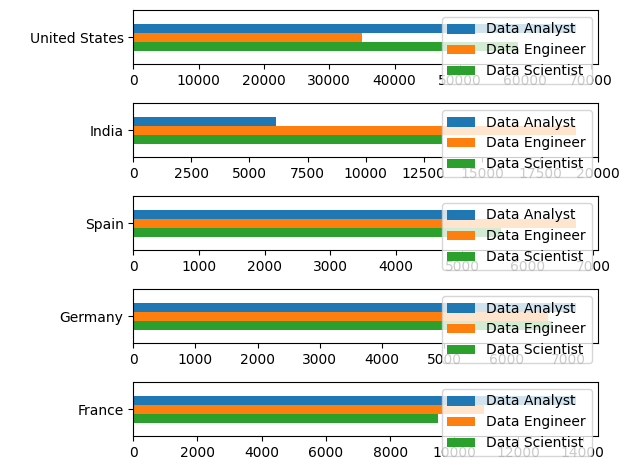

In [119]:
fig,ax = plt.subplots(5,1)
for i,country in enumerate(countries):
  df_plot=df_country[df_country.index==country]
  df_plot[top_3].plot(kind='barh', ax=ax[i])
  ax[i].invert_yaxis()
  ax[i].set_ylabel(' ')
  ax[i].legend().set_visible(True)

plt.tight_layout()

### US DF

In [120]:
df_US = df[df['job_country'] == 'United States'].copy()

In [123]:
df_US['job_posted_month'] = df_US['job_posted_date'].dt.month_name()

In [124]:
df_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,June
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",July
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '...",November
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","[sql, python, java, sql server, gcp, bigquery,...","{'cloud': ['gcp', 'bigquery'], 'databases': ['...",March
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None,October
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['...",July
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"[python, matlab, r]","{'programming': ['python', 'matlab', 'r']}",April
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,January


In [125]:
df_US_pivot = df_US.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

In [126]:
df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,565,40,6049,2801,4867,51,1025,781,991,112
August,903,39,6634,3269,6318,68,1186,903,1515,194
December,648,40,3979,2641,3472,119,601,689,752,212
February,447,24,6124,3060,4956,56,1258,878,1127,90
January,527,36,8494,2655,6915,60,1544,773,1552,114
July,581,39,5201,2570,4876,65,883,747,1095,153
June,446,32,5683,2893,4645,48,1009,812,1033,93
March,438,19,6218,3183,4779,59,1114,829,1150,115
May,279,20,4993,2976,4377,49,839,746,914,90


In [129]:
df_US_pivot.reset_index(inplace=True)
df_US_pivot['job_month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'], format='%B').dt.month
df_US_pivot.sort_values('job_month_no', inplace=True)
df_US_pivot.set_index('job_posted_month', inplace=True)
df_US_pivot.drop(columns='job_month_no', inplace=True)

In [130]:
df_US_pivot

job_title_short,level_0,index,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,,,
January,4,4,527,36,8494,2655,6915,60,1544,773,1552,114
February,3,3,447,24,6124,3060,4956,56,1258,878,1127,90
March,7,7,438,19,6218,3183,4779,59,1114,829,1150,115
April,0,0,565,40,6049,2801,4867,51,1025,781,991,112
May,8,8,279,20,4993,2976,4377,49,839,746,914,90
June,6,6,446,32,5683,2893,4645,48,1009,812,1033,93
July,5,5,581,39,5201,2570,4876,65,883,747,1095,153
August,1,1,903,39,6634,3269,6318,68,1186,903,1515,194
September,11,11,897,50,4639,3224,4568,113,805,775,1014,228


In [134]:
month_list=df_US_pivot.index.to_list()

C:\Users\AB\AppData\Local\Temp\ipykernel_16940\1646055193.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


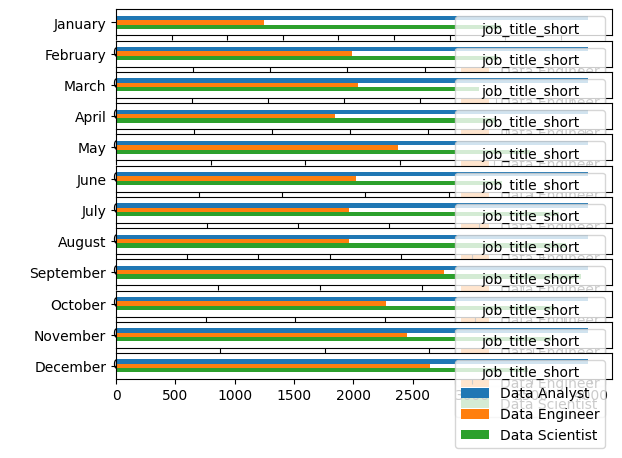

In [142]:
fig,ax = plt.subplots(12,1)

for i,months in enumerate(month_list):
    month_plot = df_US_pivot[df_US_pivot.index==months]
    month_plot[top_3].plot(kind='barh',ax=ax[i])
    ax[i].invert_yaxis()
    ax[i].set_ylabel(' ')

plt.tight_layout()